In [1]:
import pandas as pd
import numpy as np

In [17]:
from google.colab import files


# Upload the file
uploaded = files.upload()

# Load the uploaded CSV file
X_data = pd.read_csv('vectorized_graphs4.csv')  # Replace with your actual filename
print(X_data.head())


Saving vectorized_graphs4.csv to vectorized_graphs4.csv
   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       6       6       6       6       6       0       0       0       6   
1       6       6       6       6       0       0       0       0       6   
2       6       6       6       0       0       0       0       0       6   
3       2       2       2       2       0       0       0       0       2   
4      16       6       6       0       0       0       0       0       6   

   Edge_10  ...  Edge_27  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  \
0        6  ...        6        0        0        0        0        0   
1        6  ...        0        0        0        0        6        0   
2        6  ...        0        0        0        0        0        0   
3        2  ...        2        0        0        0        0        0   
4        6  ...        0        0        0        0       16        0   

   Edge_33  Edge_34  Edge_35  Edge_36  
0 

In [ ]:
# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
Y_data = pd.read_csv('rigidity_results.csv')  
print(Y_data.head())

Saving rigidity_results.csv to rigidity_results (1).csv
   Is_Rigid
0         1
1         1
2         0
3         1
4         0


In [19]:
# Concatenate the two DataFrames
dataset = pd.concat([X_data, Y_data], axis=1)
print(dataset.head())


   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       6       6       6       6       6       0       0       0       6   
1       6       6       6       6       0       0       0       0       6   
2       6       6       6       0       0       0       0       0       6   
3       2       2       2       2       0       0       0       0       2   
4      16       6       6       0       0       0       0       0       6   

   Edge_10  ...  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  Edge_33  \
0        6  ...        0        0        0        0        0        0   
1        6  ...        0        0        0        6        0        0   
2        6  ...        0        0        0        0        0        0   
3        2  ...        0        0        0        0        0        0   
4        6  ...        0        0        0       16        0        0   

   Edge_34  Edge_35  Edge_36  Is_Rigid  
0        0        0        0         1  
1        0      

In [21]:
# Normalize all columns except the last one to the range [0, 1]
for column in dataset.columns[:-1]:  # Loop through all columns except the last
    min_val = dataset[column].min()
    max_val = dataset[column].max()

    # Check if min and max are the same
    if min_val == max_val:
        dataset[column] = 0
    else:
        # Apply min-max normalization
        dataset[column] = (dataset[column] - min_val) / (max_val - min_val)

# Replace any remaining NaN values with 0
dataset = dataset.fillna(0)

# View the first few rows of the normalized data
print(dataset.head())


     Edge_1    Edge_2    Edge_3    Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  \
0  0.100000  0.250000  0.250000  0.250000    0.25     0.0     0.0     0.0   
1  0.100000  0.250000  0.250000  0.250000    0.00     0.0     0.0     0.0   
2  0.100000  0.250000  0.250000  0.000000    0.00     0.0     0.0     0.0   
3  0.033333  0.083333  0.083333  0.083333    0.00     0.0     0.0     0.0   
4  0.266667  0.250000  0.250000  0.000000    0.00     0.0     0.0     0.0   

     Edge_9   Edge_10  ...  Edge_28  Edge_29  Edge_30   Edge_31  Edge_32  \
0  0.100000  0.250000  ...      0.0      0.0      0.0  0.000000      0.0   
1  0.100000  0.250000  ...      0.0      0.0      0.0  0.125000      0.0   
2  0.100000  0.250000  ...      0.0      0.0      0.0  0.000000      0.0   
3  0.033333  0.083333  ...      0.0      0.0      0.0  0.000000      0.0   
4  0.100000  0.250000  ...      0.0      0.0      0.0  0.333333      0.0   

   Edge_33   Edge_34  Edge_35  Edge_36  Is_Rigid  
0      0.0  0.000000      0.0

In [22]:
from sklearn.model_selection import train_test_split

# Split the combined dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [23]:
# Separate input (features) and output (target) for the training set
input_training = train_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_training = train_set['Is_Rigid'].to_numpy()

# Separate input (features) and output (target) for the testing set
input_test = test_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_test = test_set['Is_Rigid'].to_numpy()


In [24]:
# builiding model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [25]:
# compile model
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [27]:
history = model.fit(input_training,
 output_training,
 epochs=30,
 batch_size=1000,
 validation_data=(input_test, output_test))


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8569 - loss: 0.3446 - val_accuracy: 0.8441 - val_loss: 0.3593
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8547 - loss: 0.3432 - val_accuracy: 0.8464 - val_loss: 0.3553
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8607 - loss: 0.3347 - val_accuracy: 0.8439 - val_loss: 0.3557
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8570 - loss: 0.3336 - val_accuracy: 0.8452 - val_loss: 0.3504
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8625 - loss: 0.3264 - val_accuracy: 0.8502 - val_loss: 0.3454
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8579 - loss: 0.3307 - val_accuracy: 0.8518 - val_loss: 0.3422
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8655 - loss: 0.3221 - val_accuracy: 0.8530 - val_loss: 0.3396
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8662 - loss: 0.3178 - val_accuracy: 0.8532 - val_lo

In [30]:
results = model.evaluate(input_test, output_test)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8790 - loss: 0.2910


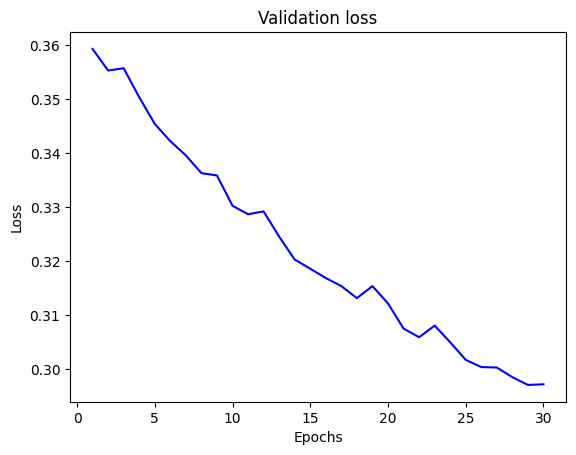

In [29]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()